### SUNA Nitrate Filter

- 35hr lanzcos cosine squared filter
- timeseries must be gridded (no gaps) or it will be linearly interpolated to hourly




## Software Requirements

Developed/tested for:
- python >=3.6 ** Tested
- python =2.7 ** Works as of 7/15/19 but not developed for (more extensive 'vtools' needs python 2.7)

requires:
- pyyaml >= 3.13 
- pandas >= 0.24.2
- numpy >= 1.15.4

- lanzcos (local library)

In [168]:
import pandas as pd
import numpy as np
import lanzcos

In [169]:
#raw data - path below should be full path to file
path_to_file = '/Users/bell/Downloads/17ckp2a_merge_190715.csv'
time_column_name = 'date'
var2filter_name = 'no3'

data=pd.read_csv(path_to_file,
                 na_values = [1.0e35],
                 parse_dates=True,
                 index_col=time_column_name)

missing_index = np.isnan(data[var2filter_name])
data = data.resample('1H').mean()



In [170]:
## missing data pad
temp = data[var2filter_name].interpolate(method='time')

In [171]:
#filter data with rudimentary matlab script
data[var2filter_name+'_f35'] = lanzcos.lanzcos(temp.values,1,35)

In [172]:
#not sure why but results of filtered data seem to need the mean of the sample
# to be added back
print("{} is close to zero for mean of filtered data".format(data[var2filter_name+'_f35'].mean()))
print("{} is for mean of unfiltered data".format(data[var2filter_name].mean()))
print("{} is the mean of difference of filtered and unfiltered data".format(
    (data[var2filter_name+'_f35']-data[var2filter_name]).mean()))



1.53648164507e-16 is close to zero for mean of filtered data
9.42987791297 is for mean of unfiltered data
-9.48626345865 is the mean of difference of filtered and unfiltered data


In [173]:
#filter data with rudimentary matlab script - mean offset corrected
data[var2filter_name+'_f35'] = lanzcos.lanzcos(temp.values,1,35)+data[var2filter_name].mean()
data[var2filter_name+'_f35'][missing_index] = np.nan

## Plot data for Visual Representation

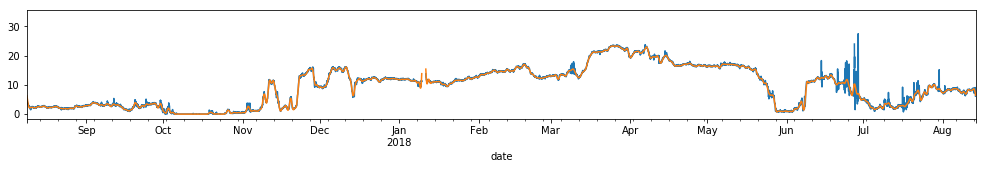

In [174]:
%matplotlib inline

# only for plotting timeseries
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(17, 2))

data[var2filter_name].plot()
data[var2filter_name+'_f35'].plot()


(420768, 421512)

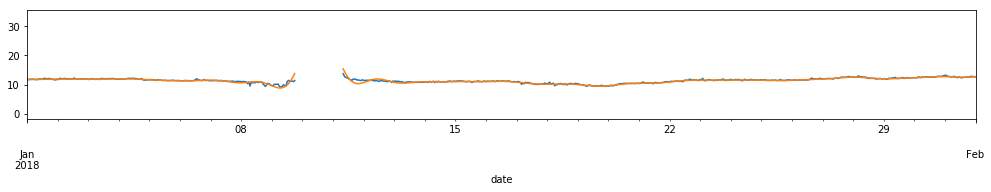

In [175]:
fig, ax = plt.subplots(figsize=(17, 2))

data[var2filter_name].plot()
data[var2filter_name+'_f35'].plot()

ax.set_xlim(['01-2018','2-2018'])

## Output results file in csv for archive

In [176]:
data.to_csv(path_to_file.replace('.csv','_f35.csv'))